### first, download the dataset either manually or through the API provided by Kaggle(optional)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np     
import seaborn as sns     

In [2]:
nyc_data = pd.read_csv('./data/nyc_taxi_data_2014.csv' , low_memory=False) 

In [3]:
nyc_data = nyc_data.sample(frac=.01).reset_index(drop=True)
nyc_data

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2014-01-09 14:13:28,2014-01-09 14:16:32,1,0.50,0.000000,0.000000,1,Y,0.000000,0.000000,CRD,4.0,0.0,0.5,0.90,0.0,5.40
1,CMT,2014-01-01 15:35:03,2014-01-01 15:37:37,1,0.70,-73.962691,40.766949,1,N,-73.957376,40.776032,CRD,4.5,0.0,0.5,1.00,0.0,6.00
2,VTS,2014-01-01 18:47:00,2014-01-01 18:51:00,1,0.35,-73.993387,40.736017,1,NaN,-73.993100,40.734927,CSH,4.5,0.0,0.5,0.00,0.0,5.00
3,CMT,2014-01-10 11:04:06,2014-01-10 11:13:30,1,1.20,-73.977010,40.774866,1,Y,-73.981162,40.760691,CSH,7.5,0.0,0.5,0.00,0.0,8.00
4,CMT,2014-01-11 12:59:15,2014-01-11 13:20:54,1,4.60,-74.007707,40.723580,1,N,-73.976913,40.777600,CRD,18.5,0.0,0.5,3.80,0.0,22.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,VTS,2014-01-30 17:53:00,2014-01-30 18:00:00,2,1.31,-74.001012,40.730900,1,NaN,-74.003990,40.742082,CSH,7.0,1.0,0.5,0.00,0.0,8.50
149996,CMT,2014-01-31 08:50:57,2014-01-31 09:12:24,1,2.80,-74.013018,40.716198,1,N,-73.987676,40.736710,CRD,15.5,0.0,0.5,1.00,0.0,17.00
149997,CMT,2014-01-05 15:24:18,2014-01-05 15:38:07,2,3.70,-74.004753,40.710022,1,N,-73.987507,40.728768,CRD,14.0,0.0,0.5,2.90,0.0,17.40
149998,VTS,2014-01-04 14:27:00,2014-01-04 14:34:00,1,1.04,-73.956547,40.771317,1,NaN,-73.967408,40.763280,CSH,6.5,0.0,0.5,0.00,0.0,7.00


In [4]:
nyc_data.isna().sum()

vendor_id                 0
pickup_datetime           0
dropoff_datetime          0
passenger_count           0
trip_distance             0
pickup_longitude          0
pickup_latitude           0
rate_code                 0
store_and_fwd_flag    76440
dropoff_longitude         4
dropoff_latitude          4
payment_type              0
fare_amount               0
surcharge                 0
mta_tax                   0
tip_amount                0
tolls_amount              0
total_amount              0
dtype: int64

### handling missing values and removing unnecessary features and also modifing some features type 

In [5]:
nyc_df = nyc_data.drop(columns=['vendor_id', 'store_and_fwd_flag' , 'payment_type'])
nyc_df.dropna(inplace=True) # because very small percentage of data is nan we dropoff them
nyc_df['pickup_datetime'] = pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime'] = pd.to_datetime(nyc_df['dropoff_datetime'])

### in here , we extract the target and trip duration from pick and drop off data time 

In [8]:
trip_duration = nyc_df['dropoff_datetime'] - nyc_df['pickup_datetime']
nyc_df['target_time(s)'] = pd.to_timedelta(trip_duration).dt.total_seconds()
nyc_df.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,target_time(s)
0,2014-01-09 14:13:28,2014-01-09 14:16:32,1,0.50,0.000000,0.000000,1,0.000000,0.000000,4.0,0.0,0.5,0.9,0.0,5.4,184.0
1,2014-01-01 15:35:03,2014-01-01 15:37:37,1,0.70,-73.962691,40.766949,1,-73.957376,40.776032,4.5,0.0,0.5,1.0,0.0,6.0,154.0
2,2014-01-01 18:47:00,2014-01-01 18:51:00,1,0.35,-73.993387,40.736017,1,-73.993100,40.734927,4.5,0.0,0.5,0.0,0.0,5.0,240.0
3,2014-01-10 11:04:06,2014-01-10 11:13:30,1,1.20,-73.977010,40.774866,1,-73.981162,40.760691,7.5,0.0,0.5,0.0,0.0,8.0,564.0
4,2014-01-11 12:59:15,2014-01-11 13:20:54,1,4.60,-74.007707,40.723580,1,-73.976913,40.777600,18.5,0.0,0.5,3.8,0.0,22.8,1299.0


We analyzed the correlation between features and the target variable (`target_time`), we also try to detect extreme outliers with the help of logarithmic distribution 

Key findings:
- **`total_amount`**, **`fare amount`**, and **`tip amount`** and **`trip_distance`** show a **positive correlation** with `target_time`.
- A long right tail in the distribution shows we have extreme outliers.


c:\Users\Alchemist\Desktop\NewYork_Taxi_Travel_Prediction-main\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


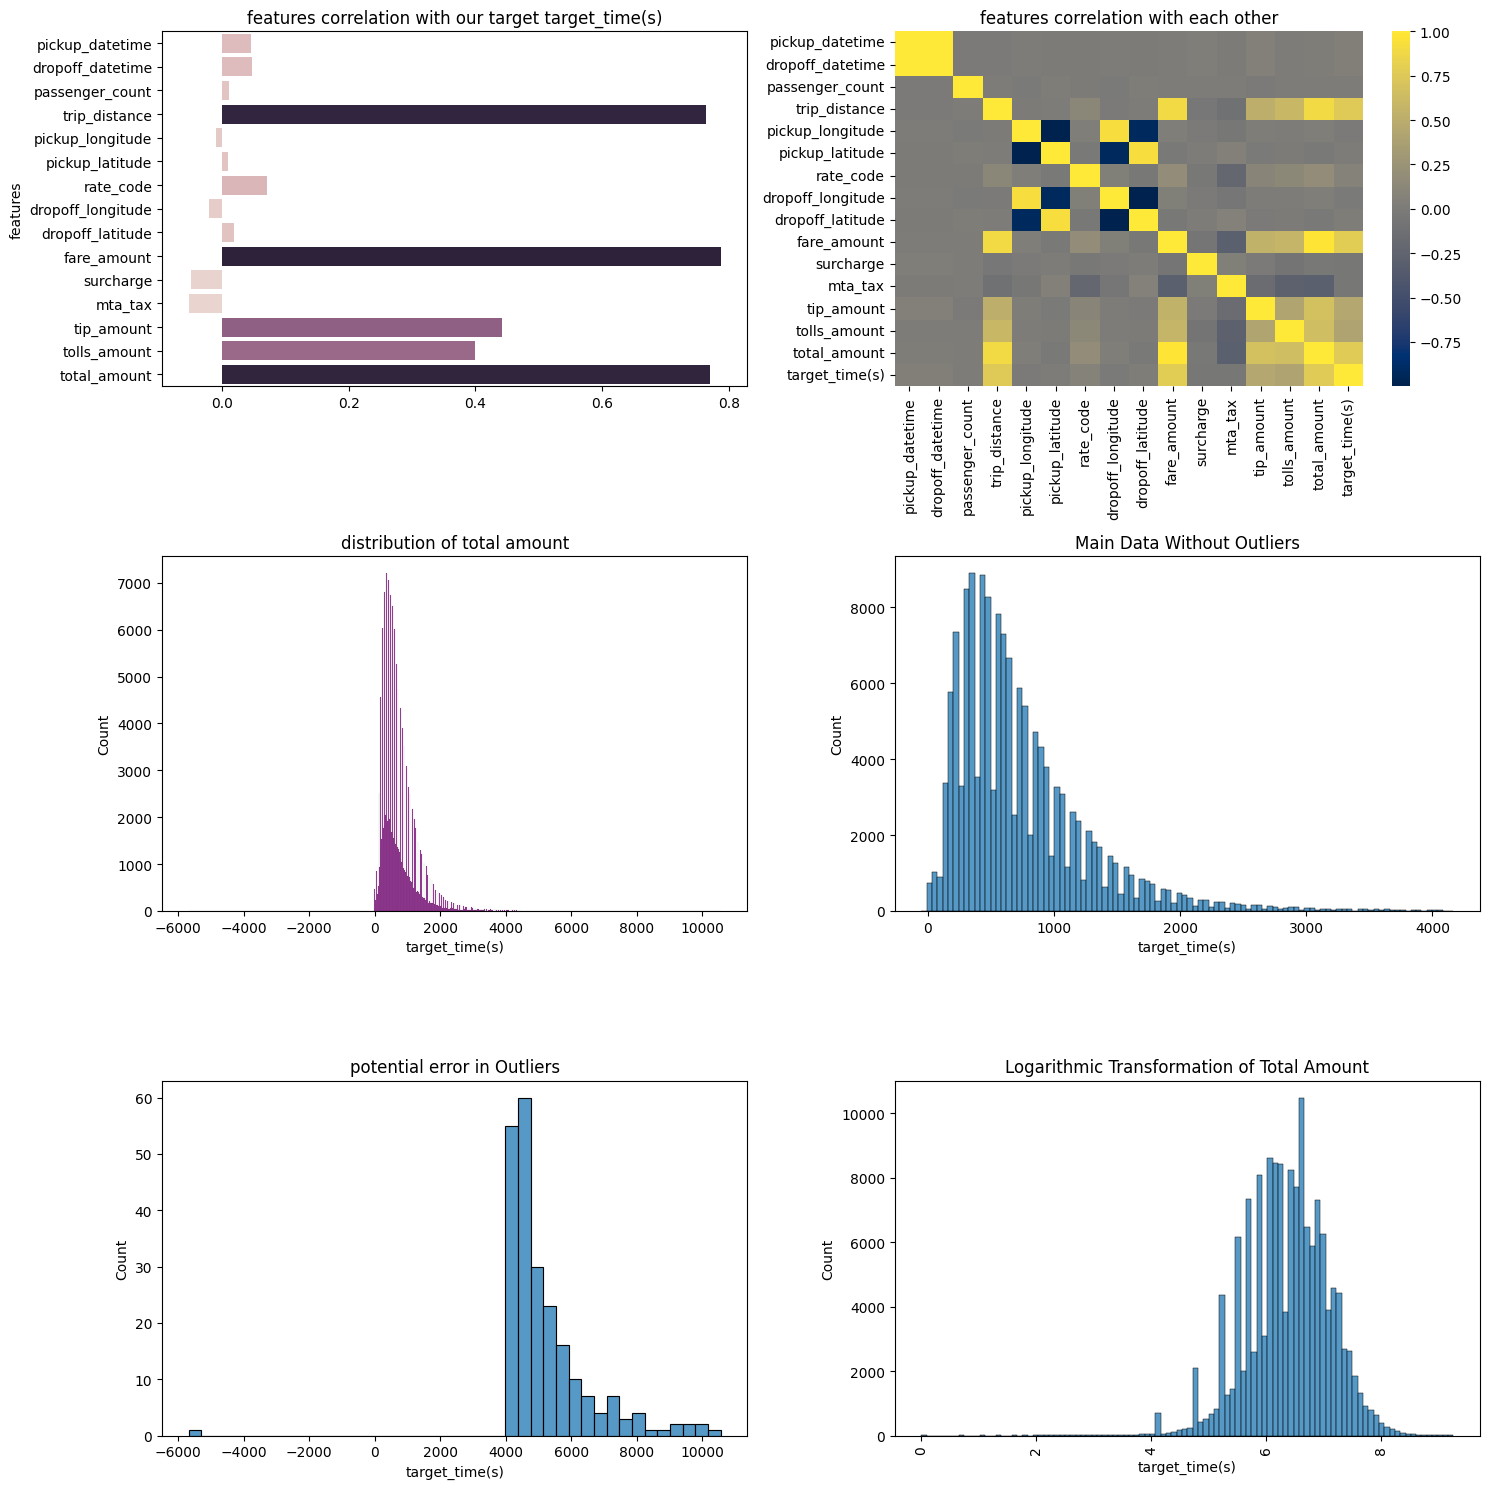

In [9]:
correlation = nyc_df.corr()['target_time(s)'].drop('target_time(s)') # just wanted to put target_time aside to prevent 1 vs 1 showing up 
fig , axes = plt.subplots(3, 2 , figsize=(15,15))
sns.barplot(y=correlation.index , x=correlation.values ,hue=correlation.values , legend=False , ax=axes[0 , 0])
axes[0 , 0].set_title('features correlation with our target target_time(s)')

axes[0 ,0].set_ylabel('features')

plt.xticks(rotation=90);

# lets see  the distribution of 'target_time(s)' 

sns.heatmap(nyc_df.corr() , ax =axes[0 ,1], cmap='cividis')
axes[0 , 1].set_title('features correlation with each other')


sns.histplot(x=nyc_df['target_time(s)'] , ax=axes[1, 0] , color='purple')
axes[1, 0].set_title('distribution of total amount')

# Set thresholds for identifying outliers , i decided to consider very low and high treshhold for this
q1 = nyc_df['target_time(s)'].quantile(0.05)
q3 = nyc_df['target_time(s)'].quantile(0.95)
IQR = q3 - q1
lower_outliers_threshold = q1 - 1.5*IQR 
upper_outliers_threshold = q3 + 1.5*IQR

# Ploting 'target_time(s)' without outliers, to focuse on the main data distribution

sns.histplot(x=nyc_df[(nyc_df['target_time(s)']< upper_outliers_threshold) & (nyc_df['target_time(s)']> lower_outliers_threshold)]['target_time(s)'] , ax=axes[1, 1] , bins=100)
axes[1, 1].set_title('Main Data Without Outliers')


outliers = nyc_df[(nyc_df['target_time(s)'] > upper_outliers_threshold) | (nyc_df['target_time(s)'] < lower_outliers_threshold)] 

sns.histplot(outliers['target_time(s)'] , ax=axes[2, 0])
axes[2, 0].set_title(f'potential error in Outliers')

# i used logarithmic transformation to 'target_time(s)' to reduce the impact of outliers and see the distribution more clearly

sns.histplot(x=np.log(nyc_df['target_time(s)'].replace(0, np.nan).dropna())  , ax=axes[2, 1] , bins=100 ) ## since some values are zero , they are invalid and raise error for np.log i removed them 
axes[2, 1].set_title('Logarithmic Transformation of Total Amount')

plt.tight_layout()



In [12]:
nyc_df.drop(nyc_df[(nyc_df['target_time(s)'] < 5)].index , axis=0 , inplace=True) # Dropping rows with negative or lower thant 5s  travel time,is unusuall , i tried to remove it 

### Date and Time Feature Extraction  
Extracted relevant features (day, weekday, month, hour, minute) from `pickup_datetime` and `dropoff_datetime` for analysis and modeling, focusing only on useful time components since all data is from 2014 and trips are shorter than a day.  


In [21]:
#since data is only in 2014 so year doesn't matter 
nyc_df['pickup_weekday']=nyc_df['pickup_datetime'].dt.weekday
nyc_df['pickup_month']=nyc_df['pickup_datetime'].dt.month
nyc_df['pickup_hour']=nyc_df['pickup_datetime'].dt.hour


#### since some features like weekend , holiday or rush hours can affect our target time , we created those features to see if our model find pattern in them


In [22]:
nyc_df['pickup_is_weekend'] = nyc_df['pickup_weekday'].apply(lambda x: 1 if x >= 5 else 0) 
# since weekend matter and its special ocasion i tried to create feature here , for weekend where 
# weekday is higher that 5 , saturday and sunday
nyc_df['is_rush_hour'] = nyc_df['pickup_hour'].isin([7, 8, 9  , 17, 18, 19]).astype(int)
nyc_df['is_holiday'] = nyc_df['pickup_month'].isin([12, 1]).astype(int)

In [23]:
nyc_df.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,...,tip_amount,tolls_amount,total_amount,target_time(s),pickup_weekday,pickup_month,pickup_hour,pickup_is_weekend,is_rush_hour,is_holiday
0,2014-01-09 14:13:28,2014-01-09 14:16:32,1,0.50,0.000000,0.000000,1,0.000000,0.000000,4.0,...,0.9,0.0,5.4,184.0,3,1,14,0,0,1
1,2014-01-01 15:35:03,2014-01-01 15:37:37,1,0.70,-73.962691,40.766949,1,-73.957376,40.776032,4.5,...,1.0,0.0,6.0,154.0,2,1,15,0,0,1
2,2014-01-01 18:47:00,2014-01-01 18:51:00,1,0.35,-73.993387,40.736017,1,-73.993100,40.734927,4.5,...,0.0,0.0,5.0,240.0,2,1,18,0,1,1
3,2014-01-10 11:04:06,2014-01-10 11:13:30,1,1.20,-73.977010,40.774866,1,-73.981162,40.760691,7.5,...,0.0,0.0,8.0,564.0,4,1,11,0,0,1
4,2014-01-11 12:59:15,2014-01-11 13:20:54,1,4.60,-74.007707,40.723580,1,-73.976913,40.777600,18.5,...,3.8,0.0,22.8,1299.0,5,1,12,1,0,1


### we don't need haversin because we have trip distance and all of them is filled , but for having it source code i kept it 

In [ ]:
# from math import radians, cos, sin, sqrt, atan2

# def haversine(lon1, lat1, lon2, lat2):
#     R = 6371  # Earth radius in km
#     dlon = radians(lon2 - lon1)
#     dlat = radians(lat2 - lat1)
#     a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
#     c = 2 * atan2(sqrt(a), sqrt(1 - a))
#     return R * c

# nyc_df['haversine_distance'] = nyc_df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'],
#                                                           row['dropoff_longitude'], row['dropoff_latitude']), axis=1)


### I created features like `is_rush_hour`, `is_holiday`, and `pickup_is_weekend` and performed analytical visualizations to explore how these features interact with the target variable.

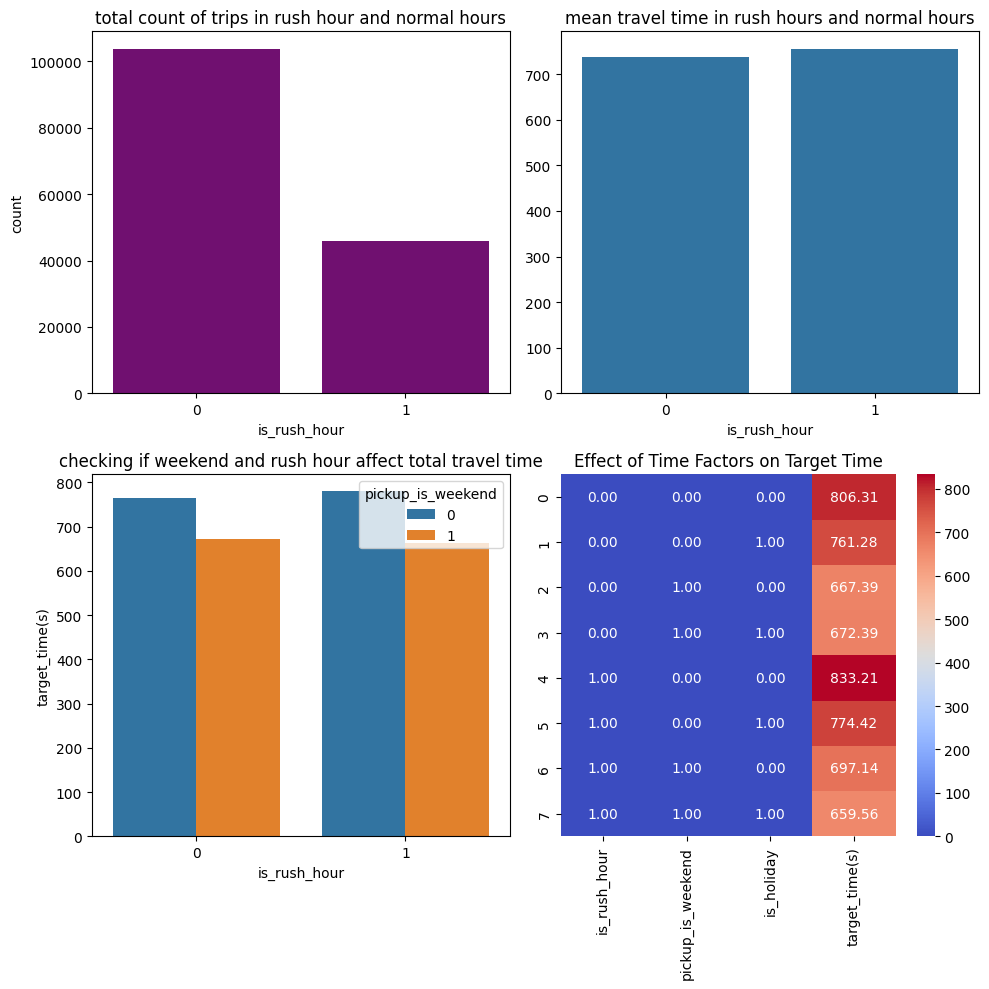

In [24]:
fig , axes = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot(x=nyc_df['is_rush_hour'], color='purple' , ax=axes[0, 0])
axes[0, 0].set_title('total count of trips in rush hour and normal hours')

mean_amount  = nyc_df.groupby('is_rush_hour')['target_time(s)'].mean()

sns.barplot(x=mean_amount.index , y= mean_amount.values , ax=axes[0 ,1])
axes[0, 1].set_title('mean travel time in rush hours and normal hours')

mean_amount_weekend= nyc_df.groupby(['is_rush_hour', 'pickup_is_weekend'])['target_time(s)'].mean()
sns.barplot(data=mean_amount_weekend.reset_index(), x='is_rush_hour', y='target_time(s)', hue='pickup_is_weekend', ax=axes[1, 0])

axes[1, 0].set_title('checking if weekend and rush hour affect total travel time')
mean_amount = nyc_df.groupby(['is_rush_hour', 'pickup_is_weekend', 'is_holiday'])['target_time(s)'].mean()

sns.heatmap(mean_amount.reset_index(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True , ax=axes[1,1])
axes[1, 1].set_title('Effect of Time Factors on Target Time')

mean_amount.reset_index()
fig.tight_layout()



In [25]:
nyc_df.drop(['passenger_count', 'pickup_longitude', 'pickup_latitude', 
             'dropoff_longitude', 'dropoff_latitude', 
              'pickup_weekday' , 'pickup_datetime' , 'dropoff_datetime'], axis=1, inplace=True)


In [26]:
nyc_df.sample(frac=.01)

,trip_distance,rate_code,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,target_time(s),pickup_month,pickup_hour,pickup_is_weekend,is_rush_hour,is_holiday
138394,6.44,1,22.5,1.0,0.5,0.0,0.0,24.0,1440.0,1,19,0,1,1
126983,3.56,1,13.0,0.5,0.5,0.0,0.0,14.0,780.0,1,22,0,0,1
87936,1.58,1,10.0,1.0,0.5,1.0,0.0,12.5,780.0,1,19,0,1,1
7021,0.80,1,7.5,0.0,0.5,0.0,0.0,8.0,573.0,1,12,0,0,1
73897,6.00,1,21.5,0.0,0.5,5.5,0.0,27.5,1169.0,1,12,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102582,2.21,1,10.5,0.5,0.5,0.0,0.0,11.5,780.0,1,21,0,0,1
126202,1.20,1,7.0,0.0,0.5,0.0,0.0,7.5,405.0,1,9,0,1,1
5228,0.60,1,5.0,1.0,0.5,1.3,0.0,7.8,227.0,1,18,0,1,1
70453,4.22,1,15.5,0.0,0.5,2.0,0.0,18.0,900.0,1,18,1,1,1


### here we already selected some features , but with feature selection , i want to pick top 5 features to test them to to see if i can get most accuracy

In [37]:

### let pick top 5 features automatically with help of sklearn

from sklearn.feature_selection import SelectKBest, f_regression 
train_df = nyc_df.drop('target_time(s)', axis=1 )
target = nyc_df['target_time(s)']
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit_transform(train_df , target)
selected_features_by_sklearn = train_df.columns[selector.get_support()]
# selector.get_support() returns boolean [true false true false ,...]
boolean_type_features = nyc_df.isin([0 ,1]).all()

### since f_classif checks the correlation and doesn't understand boolean type (1, 0) like is weekend or rush hour we keep them for our model manually

In [44]:
boolean_type_features = boolean_type_features.index[boolean_type_features] # i returned the one that all of them has 0 or 1 value 
boolean_type_features
# [x for x, y in zip(series.index, series.values) if y]  # series.index[series] is basically doing this, just a note here for future review

Index(['pickup_is_weekend', 'is_rush_hour', 'is_holiday'], dtype='object')

In [45]:
total_important_features = selected_features_by_sklearn.append(boolean_type_features)
total_important_features

Index(['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount',
       'total_amount', 'pickup_is_weekend', 'is_rush_hour', 'is_holiday'],
      dtype='object')

In [46]:
train_df_selected_best = train_df[total_important_features]
train_df_selected_best.head()
## warning ..> we ignore this featuer selection because we have enough feature no need to deacrease them more 

,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,pickup_is_weekend,is_rush_hour,is_holiday
0,0.50,4.0,0.9,0.0,5.4,0,0,1
1,0.70,4.5,1.0,0.0,6.0,0,0,1
2,0.35,4.5,0.0,0.0,5.0,0,1,1
3,1.20,7.5,0.0,0.0,8.0,0,0,1
4,4.60,18.5,3.8,0.0,22.8,1,0,1


# Training our model

In [47]:
# since we are predicting the continues value we test out the regression model on our data set 

from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from skopt import BayesSearchCV 
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV  , learning_curve
from scipy.stats import randint , uniform


x_train , x_test , y_train ,y_test = train_test_split(train_df, target, train_size=.8)

hyperparameters = {
    'xgboost': {
        'n_estimators': randint(50  ,80),# generates random int values like np.random.randint(50 ,80)
        'max_depth': randint(6, 15), # 
        'learning_rate': uniform(0.1, 0.3) # generates random floating piont :) like # np.random.uniform(0.1, 0.3)
    },
    'RandomForest': {
        'n_estimators': randint(50, 80),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 10),
        'max_depth': randint(30, 50),
        'max_features': [ 'sqrt', 'log2'],
    },

}


def train_dataset(model , hyperparameters , x_train, y_train):
    if hyperparameters : 
        random_search_result = RandomizedSearchCV(model , param_distributions=hyperparameters , n_iter=10, cv=2, scoring='r2', random_state=42 , n_jobs=-1)
        rsr_model = random_search_result.fit(x_train, y_train)
        return rsr_model.best_estimator_  
    else: 
        model.fit(x_train , y_train)
        return model
        


rsr_model = train_dataset(RandomForestRegressor(), hyperparameters['RandomForest'] , x_train, y_train)
xgb_model = train_dataset(XGBRegressor(), hyperparameters['xgboost'], x_train , y_train)
lin_model = train_dataset(LinearRegression(),  None, x_train, y_train)


print(f'best random forest model and paramters are => {rsr_model}' )
print(f'best xgboost model and paramters are => {xgb_model}' )
print(f'best linear regression model is => {lin_model}' )
    



best random forest model and paramters are => RandomForestRegressor(max_depth=46, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=5, n_estimators=72)
best xgboost model and paramters are => XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None,
             learning_rate=np.float64(0.10617534828874074), max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=73, n_jobs=None,
             num_parallel_tree=None, random_state=None, 

In [48]:
#! i wanted to add seaching mechanism to function too , but one cell took too much time to train so i rewrote the code
hyperparameters_bayes= {
    'xgboost':{
        'n_estimators': (100, 200),
        'max_depth': (6, 15),
        'learning_rate': (0.1, 0.3)
    },

    'RandomForest': {
        'n_estimators': (50, 100),
        'min_samples_split': (2, 20),
        'min_samples_leaf': (1, 10),
        'max_depth': (30, 100),
        'max_features': ['sqrt', 'log2'],
    }
}

def train_dataset_with_Bayes(model , hyperparameters , x_train, y_train):
    bayes_search_result = BayesSearchCV(model, hyperparameters, n_iter=10, cv=2 , n_jobs=-1, scoring = 'r2')
    bsr_model = bayes_search_result.fit(x_train, y_train)
    return bsr_model.best_estimator_

bayes_rsr_model = train_dataset_with_Bayes(rsr_model, hyperparameters_bayes['RandomForest'], x_train , y_train)
bayes_xgb_model = train_dataset_with_Bayes(xgb_model, hyperparameters_bayes['xgboost'], x_train , y_train)

print('best random forest model  =' ,bayes_rsr_model)
print('best random xgboost model  =' ,bayes_xgb_model)


best random forest model  = RandomForestRegressor(max_depth=62, max_features='sqrt', min_samples_split=19,
                      n_estimators=97)
best random xgboost model  = XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.106233329106634,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=154, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


### checking r2 score

In [49]:
from sklearn.metrics import r2_score

# Predictions on train and test sets
def extract_each_score (model , model_name ,  x_train , x_test , y_train , y_test): 
    y_train_pred = model.predict(x_train) 
    y_test_pred = model.predict(x_test)

    r2_train = r2_score(y_train, y_train_pred)  
    r2_test = r2_score(y_test, y_test_pred)    
    print( f"Training R2 Score for the model {model_name} is : {r2_train}" , f"Test R2 Score for {model_name} is : {r2_test}")
    return r2_train , r2_test

bayes_rf_train, bayes_rf_test = extract_each_score(bayes_rsr_model, 'BayesianRF', x_train, x_test, y_train, y_test)
bayes_xgb_train, bayes_xgb_test = extract_each_score(bayes_xgb_model, 'BayesianXGB', x_train, x_test, y_train, y_test)
rf_train, rf_test = extract_each_score(rsr_model, 'RandomForest', x_train, x_test, y_train, y_test)
xgb_train, xgb_test = extract_each_score(xgb_model, 'XGBoost', x_train, x_test, y_train, y_test)
lr_train, lr_test = extract_each_score(lin_model, 'LinearReg', x_train, x_test, y_train, y_test)



Training R2 Score for the model BayesianRF is : 0.9392173389811006 Test R2 Score for BayesianRF is : 0.9093113738233215
Training R2 Score for the model BayesianXGB is : 0.9699942646552195 Test R2 Score for BayesianXGB is : 0.9103926443511418
Training R2 Score for the model RandomForest is : 0.9398032506629286 Test R2 Score for RandomForest is : 0.9073673628289416
Training R2 Score for the model XGBoost is : 0.9433765228789929 Test R2 Score for XGBoost is : 0.918545550438249
Training R2 Score for the model LinearReg is : 0.7052846178975788 Test R2 Score for LinearReg is : 0.7259568998606094


### checking Errors 

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to extract error metrics (MSE and MAE) for test data
def extract_error_metrics_test(model, model_name, x_test, y_test):
    # Predictions on test set
    y_test_pred = model.predict(x_test)

    # Calculating MSE and MAE for test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Printing the results
    print(f"Test MSE for the model {model_name} is : {np.round(mse_test)}")
    print(f"Test MAE for the model {model_name} is : {np.round(mae_test)}")

    return mse_test, mae_test

# Example usage for different models:
bayes_rf_mse_test, bayes_rf_mae_test = extract_error_metrics_test(bayes_rsr_model, 'BayesianRF', x_test, y_test)
bayes_xgb_mse_test, bayes_xgb_mae_test = extract_error_metrics_test(bayes_xgb_model, 'BayesianXGB', x_test, y_test)
rf_mse_test, rf_mae_test = extract_error_metrics_test(rsr_model, 'RandomForest', x_test, y_test)
xgb_mse_test, xgb_mae_test = extract_error_metrics_test(xgb_model, 'XGBoost', x_test, y_test)
lr_mse_test, lr_mae_test = extract_error_metrics_test(lin_model, 'LinearReg', x_test, y_test)


Test MSE for the model BayesianRF is : 28457.0
Test MAE for the model BayesianRF is : 68.0
Test MSE for the model BayesianXGB is : 28118.0
Test MAE for the model BayesianXGB is : 61.0
Test MSE for the model RandomForest is : 29067.0
Test MAE for the model RandomForest is : 69.0
Test MSE for the model XGBoost is : 25560.0
Test MAE for the model XGBoost is : 61.0
Test MSE for the model LinearReg is : 85992.0
Test MAE for the model LinearReg is : 169.0


### I tried to visualize how by increasing data , the perfomacne in train data and test data changes to detect if there is overfitting happening or not 

Text(0.02, 0.5, 'Score')

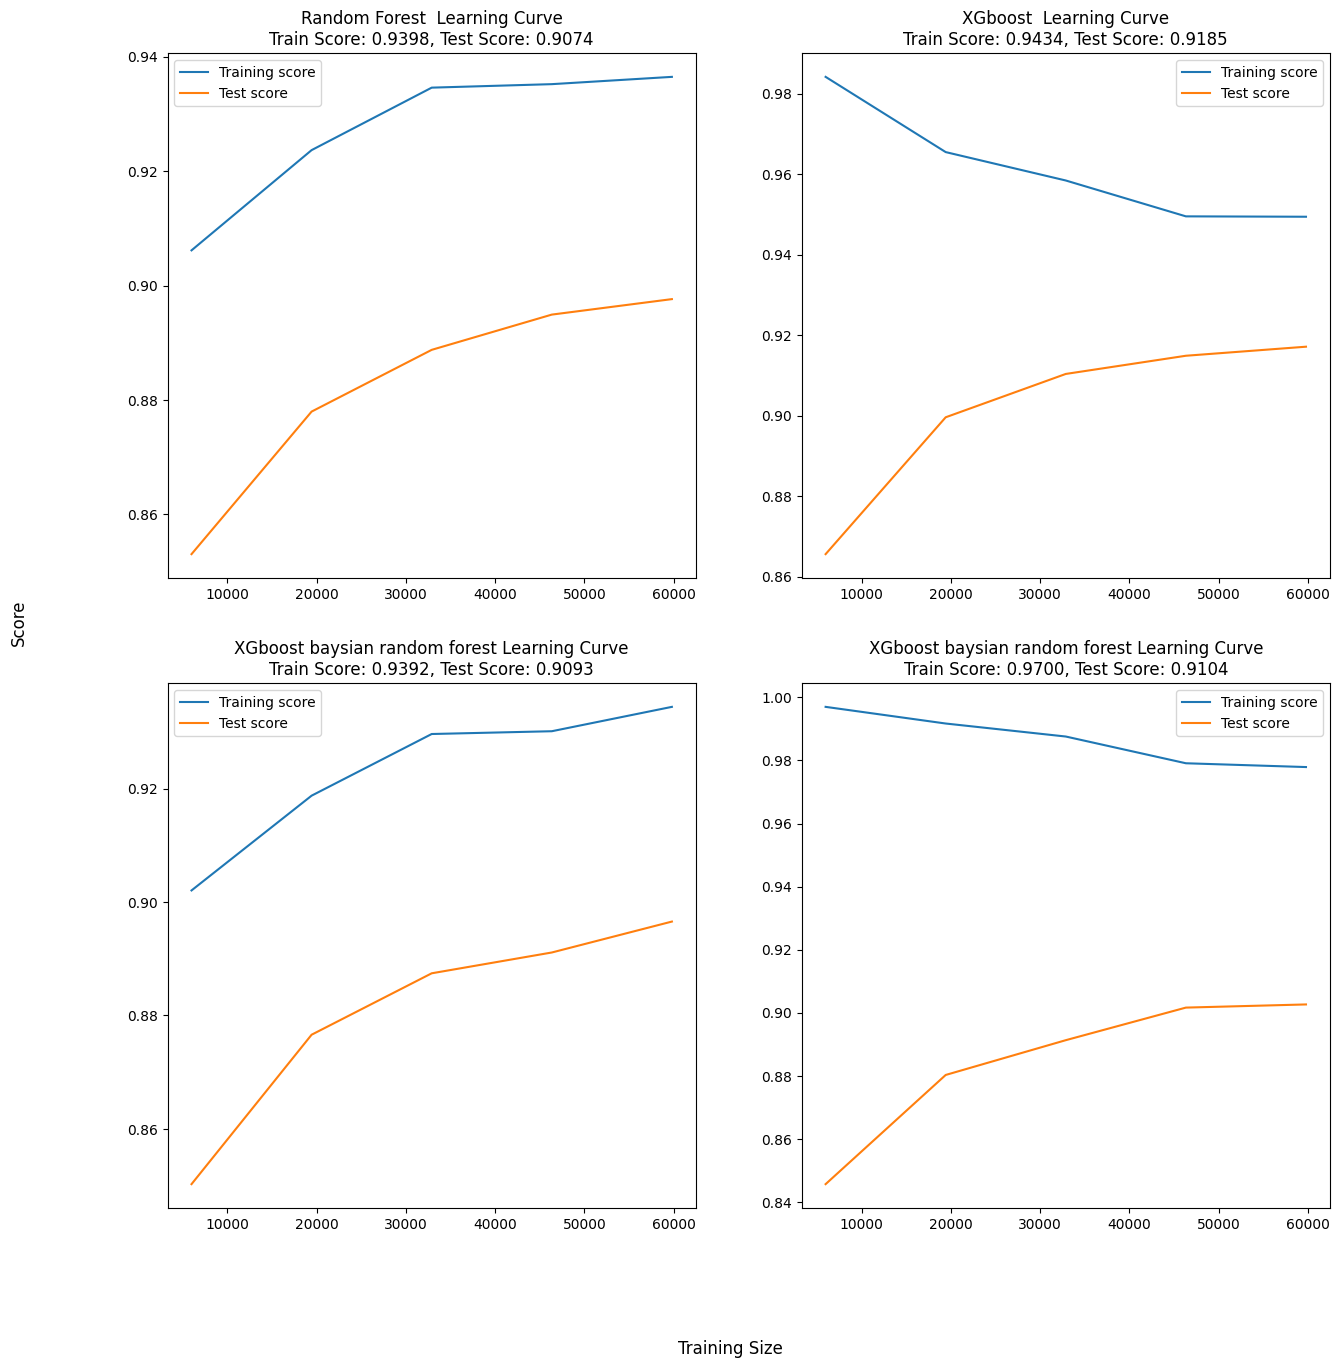

In [ ]:
fig , axes = plt.subplots(2,2, figsize=(15, 15))


def learning_curve_handler(model , x_train , y_train , axes): 
    train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=2)
    sns.lineplot(x=train_sizes, y=train_scores.mean(axis=1), ax=axes, label="Training score") # each fold has one score [[train_score_fold1 , trainscodefold2]] , so meaning the axis one , gives both fold mean score
    sns.lineplot(x=train_sizes, y=test_scores.mean(axis=1), ax=axes, label="Test score")

learning_curve_handler(rsr_model, x_train , y_train , axes[0, 0])

axes[0, 0].set_title(
    f"Random Forest  Learning Curve\nTrain Score: {rf_train:.4f}, Test Score: {rf_test:.4f}")

learning_curve_handler(xgb_model, x_train , y_train , axes[0, 1])

axes[0, 1].set_title(
    f"XGboost  Learning Curve\nTrain Score: {xgb_train:.4f}, Test Score: {xgb_test:.4f}")

learning_curve_handler(bayes_rsr_model, x_train , y_train , axes[1, 0])

axes[1, 0].set_title(
    f"XGboost baysian random forest Learning Curve\nTrain Score: {bayes_rf_train:.4f}, Test Score: {bayes_rf_test:.4f}")

learning_curve_handler(bayes_xgb_model, x_train , y_train , axes[1, 1])

axes[1, 1].set_title(
    f"XGboost baysian random forest Learning Curve\nTrain Score: {bayes_xgb_train:.4f}, Test Score: {bayes_xgb_test:.4f}")

fig.supxlabel('Training Size')
fig.supylabel('Score')



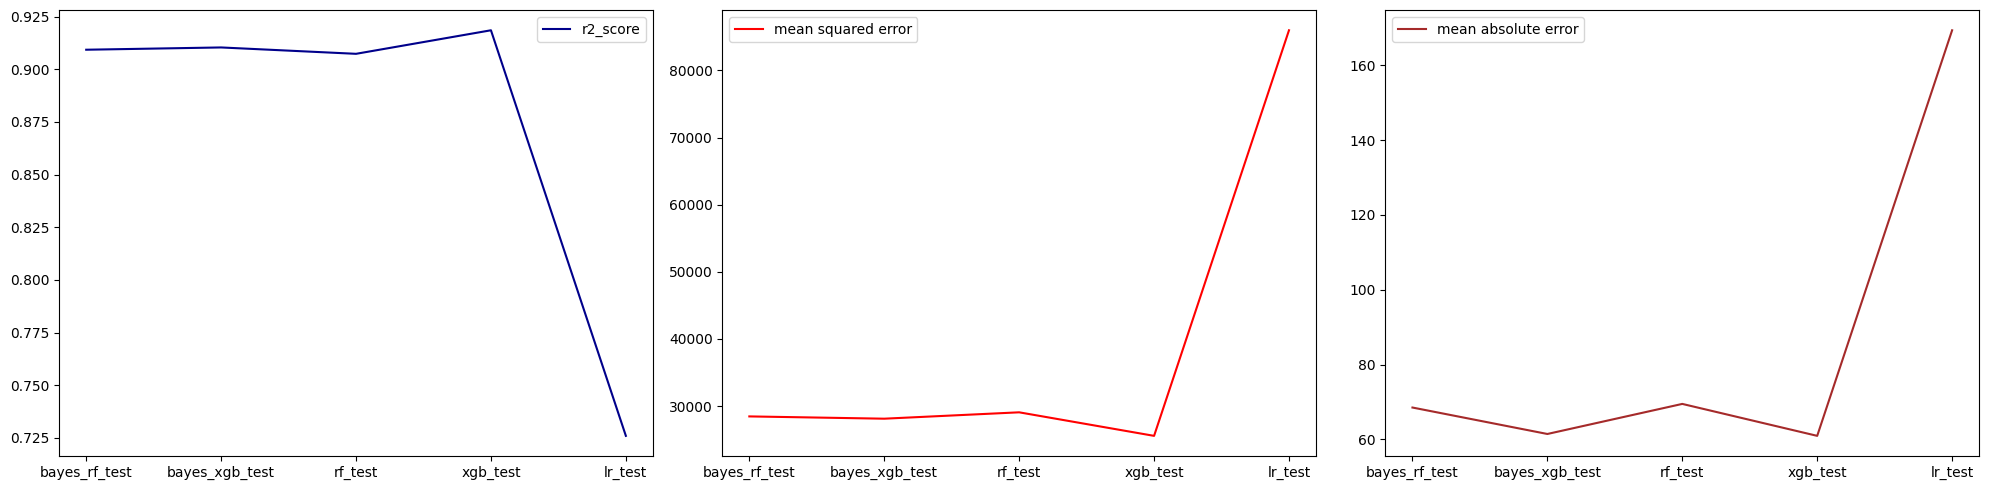

In [63]:
fig ,axes = plt.subplots(1 ,3,figsize=(20 ,5))

metrics = ["bayes_rf_test", "bayes_xgb_test", "rf_test", "xgb_test", "lr_test"]
r2_scores = [bayes_rf_test, bayes_xgb_test, rf_test, xgb_test, lr_test]  

mse_scores = [bayes_rf_mse_test, bayes_xgb_mse_test, rf_mse_test, xgb_mse_test, lr_mse_test] 
mae_scores = [bayes_rf_mae_test, bayes_xgb_mae_test, rf_mae_test, xgb_mae_test, lr_mae_test]  

sns.lineplot(x=metrics, y=r2_scores , label='r2_score', ax=axes[0], color='darkblue')
sns.lineplot(x=metrics, y=mse_scores, label='mean squared error' , ax=axes[1] , color='red')
sns.lineplot(x=metrics, y=mae_scores , label='mean absolute error' , ax=axes[2] , color='brown')

fig.tight_layout()



### Model Performance Summary

1. **`Bayes_xgb_test`**: seems to outpeforms all with minimum error and higher r2score.  
1. **`Bayesian Random Forest Regressor and Random Forest`**: rank in second in terms of performance, and difference is minimal, for better perfomance we can go for random forest too.  
3. **`Linear Regression (lr_test)`**: Performs the worst, with the lowest R² and the highest errors due its simplicity in explaining more complex data.
